## 导入包

In [1]:
import numpy as np
from IPython import display
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

## 定义辅助函数和 Animator 类

In [2]:
def use_svg_display():
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats("svg")


def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim), axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()


class Animator:
    """For plotting data in animation."""

    def __init__(
        self,
        xlabels=[None, None],
        ylabels=[None, None],
        legends=[None, None],
        xlims=[None, None],
        ylims=[None, None],
        xscales=["linear", "linear"],
        yscales=["linear", "linear"],
        fmts=["c--", "m", "g--", "r"],
        nrows=1,
        ncols=2,
        figsize=(10, 4),
    ):
        # 以 svg 矢量图格式显示
        use_svg_display()
        # Incrementally plot multiple lines
        if legends is None:
            legends = [[], []]
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        # Use a lambda function to capture arguments
        self.config_axes = lambda: (
            set_axes(
                self.axes[0],
                xlabels[0],
                ylabels[0],
                xlims[0],
                ylims[0],
                xscales[0],
                yscales[0],
                legends[0],
            ),
            set_axes(
                self.axes[1],
                xlabels[1],
                ylabels[1],
                xlims[1],
                ylims[1],
                xscales[1],
                yscales[1],
                legends[1],
            ),
        )
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        # 添加新数据
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        # 清除坐标轴上的所有内容
        self.axes[0].cla()
        self.axes[1].cla()
        # 绘制图像
        for i, (x, y, fmt) in enumerate(zip(self.X, self.Y, self.fmts)):
            if i < 2:
                self.axes[0].plot(x, y, fmt)
            else:
                self.axes[1].plot(x, y, fmt)
        # 配置图形参数
        self.config_axes()
        # 显示图像
        display.display(self.fig)
        # 当输出内容有更新时，则将旧的输出内容全部清除
        display.clear_output(wait=True)

## 创建示例数据，演示动态绘图过程

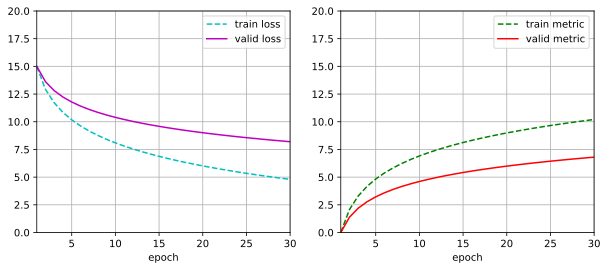

In [3]:
n_epochs = 30
# 定义可视化实例
animator = Animator(
    xlabels=["epoch", "epoch"],
    legends=[["train loss", "valid loss"], ["train metric", "valid metric"]],
    xlims=[[1, n_epochs], [1, n_epochs]],
    ylims=[[0, 20], [0, 20]],
)
for step in range(1, n_epochs + 1):
    train_loss, train_score = (-3 * np.log(step)+15, 3 * np.log(step))
    val_loss, val_score = (-2 * np.log(step)+15, 2 * np.log(step))
    # 动态地绘制损失值和评估指标的折线图
    animator.add(step, (train_loss, val_loss, train_score, val_score))